In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df=pd.read_csv(city_data_to_load)
ride_data_df=pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber_df=pd.merge(ride_data_df,city_data_df,how='left',on='city')
# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

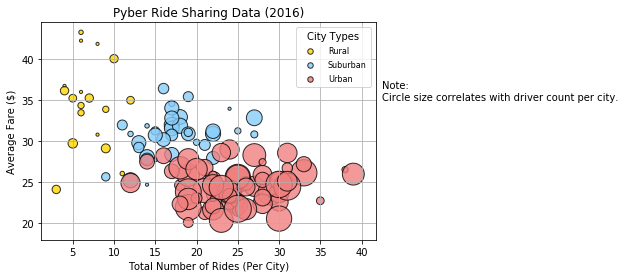

In [2]:
# Obtain the x and y coordinates for each of the three city types
number_of_ride=pyber_df.groupby(['type','city'])['date'].count()
avg_fare=pyber_df.groupby(["type","city"])['fare'].mean()
dr_count=pyber_df.groupby(["type","city"])['driver_count'].mean()

# Build the scatter plots for each city types
color=['gold','lightskyblue','lightcoral']
typename=['Rural','Suburban','Urban']
for i in range(3):
    x=number_of_ride[typename[i]]
    y=avg_fare[typename[i]]
    size=dr_count[typename[i]]
    plt.scatter(x, y, c=color[i], s=size*10, label=typename[i],
               alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.grid(True)

# Create a legend
lgnd=plt.legend(title="City Types")
lgnd.get_title().set_fontsize('10')
plt.setp(lgnd.get_texts(), fontsize='8')
for handle in lgnd.legendHandles:
    handle.set_sizes([30])
    
# Incorporate a text label regarding circle size
plt.text(42.5, 35, 'Note:\nCircle size correlates with driver count per city.')

# Save Figure
plt.savefig("Pyber Ride Sharing Data.png")

# Show Figure
plt.show()

In [3]:
'Conclusion: More drivers in Urban area and they have more rides than driver in Suburban and Rural. Rural divers have the highest average fare comparing with the other two categories.'

'Conclusion: More drivers in Urban area and they have more rides than driver in Suburban and Rural. Rural divers have the highest average fare comparing with the other two categories.'

## Total Fares by City Type

C:\Users\WenchaoWang\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


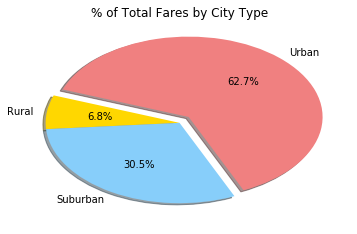

In [4]:
# Calculate Total Fare Per Different Area
fare_tol=pyber_df.groupby(['type'])['fare'].sum()

# Build Pie Chart
explode = (0,0,0.1)
plt.pie(fare_tol, explode=explode, labels=typename, colors=color,
        autopct="%1.1f%%", shadow=True, startangle=160,radius=1)
plt.axes().set_aspect(0.6)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("Total Fares by City Type.png")

# Show Figure
plt.show()

In [5]:
'Conclusion: From total fares point of view, Urban area has the most total fares, while Rural area has the least.'

'Conclusion: From total fares point of view, Urban area has the most total fares, while Rural area has the least.'

## Total Rides by City Type

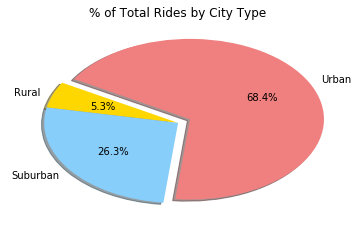

In [6]:
# Calculate Ride Per Different Area
ride=[i for i in pyber_df.groupby(['type'])['city'].count()]

# Build Pie Chart
explode = (0,0,0.1)
plt.pie(ride, explode=explode, labels=typename, colors=color,
         autopct="%1.1f%%", shadow=True, startangle=150,radius=1)
plt.axes().set_aspect(0.6)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("Total Rides by City Type.png")

# Show Figure
plt.show()

In [7]:
'Conclusion: From total rides point of view, Urban area has the most total rides, which is around 80.9 percent of the total drivers; Rural area has the least, which is only 5.3%.'

'Conclusion: From total rides point of view, Urban area has the most total rides, which is around 80.9 percent of the total drivers; Rural area has the least, which is only 5.3%.'

## Total Drivers by City Type

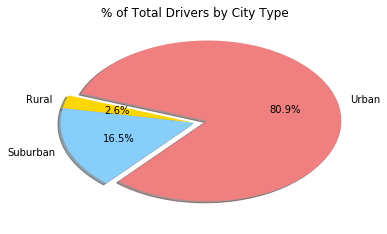

In [8]:
# Calculate Total Driver Per Different Area
driver_tol=[pyber_df.groupby(["type",'city'])['driver_count'].mean()[j].sum() for j in typename]

# Build Pie Chart
explode = (0,0,0.1)
plt.pie(driver_tol, explode=explode, labels=typename, colors=color,
         autopct="%1.1f%%", shadow=True, startangle=160,radius=1)
plt.axes().set_aspect(0.6)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("Total Drivers by City Type.png")

# Show Figure
plt.show()

In [9]:
'Conclusion: Urban area has the most drivers, which is around 80.9 percent of the total drivers; Rural area has the least, which is only 2.6%.'

'Conclusion: Urban area has the most drivers, which is around 80.9 percent of the total drivers; Rural area has the least, which is only 2.6%.'

In [10]:
## Average Fare per Driver

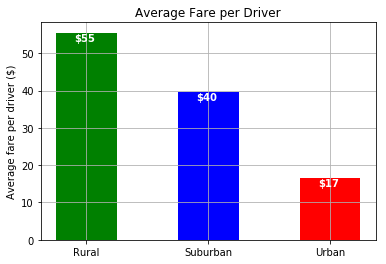

In [11]:
# Calculate Average Fare per Driver for different city types
fare_driver=fare_tol/driver_tol

# Build Bar Chart
plt.bar(typename, fare_driver,0.5, color=["g","b","r"])
plt.title("Average Fare per Driver")
plt.ylabel("Average fare per driver ($)")
plt.grid(True)

# Label the value
for i, v in enumerate(fare_driver):
    plt.text(i-0.1, v, '${:.0f}'.format(v), color='w', fontweight='bold',va='top')
    
# Save Figure
plt.savefig("Average Fare per Driver.png")

# Show Figure
plt.show()

In [12]:
'Conclusion: Rural area drivers have the highest average fare comparing the drivers in suburban and urban, which urban driver receives the least'

'Conclusion: Rural area drivers have the highest average fare comparing the drivers in suburban and urban, which urban driver receives the least'